In [1]:
# Add a command to produce plots directly below cells.
%matplotlib inline
# Import required packages.
import numpy as np
import os
# Import xarray and glob for data analysis.
import xarray as xr
from glob import glob
# Dask for processing.
import dask as da

os.chdir("/home/561/gp8431")
from climate import StandardGrid
from climate import Projection

from scipy.stats import ks_2samp

import matplotlib.pyplot as plt

import matplotlib as mpl

# Change working directory.
os.chdir("/scratch/w40/gp8431/run")


In [2]:
# Amp list is just a single dimension here
def stats_yay(heating, var, amp_list, lat_min, lat_max, p_min, p_max, x_axis, y_axis):
    fig_p = plt.figure(figsize=(16,16))
    fig_p_filtered = plt.figure(figsize=(16,16))
    fig_diff_7_filtered = plt.figure(figsize=(16,16))
    #fig_model_2 = plt.figure(figsize=(16,16))
    
    # CHECK WHICH LISTS ARE REQUIRED!
    # PLOT WITHOUT THE ZERO CASE
    amp_lp_hnp = []
    #lat_p_list_hnp = []
    
    amp_lp_hnn = []
    #lat_p_list_hnn = []
    
    amp_lp_pnh = []
    #lat_p_list_pnh = []
    
    amp_lp_pnn = []
    #lat_p_list_pnn = []
    
    amp_lp_diag = []
    #lat_p_list_diag = []
    
    lat_p_list = []
    
    # Read in data with time dimension:
    # TAKE MEAN IN LON?? 
    
    # Do significance test on data - names correspond to figure numbers. 
    # INSTEAD MAKE INTO A DATAARRAY??
    
    # ADD DIM VARIABLES
    
    # ADD ANOTHER FOR LOOP TO INITIALISE!
    
    if (var=='ucomp'):
        stat_3 = np.zeros((64, 21))
    elif (var=='hght'):
        stat_3 = np.zeros((128, 64))
    
    stat_6 = np.zeros_like(stat_3)
    stat_6 = np.zeros_like(stat_3)
    stat_7 = np.zeros_like(stat_3)
    stat_8 = np.zeros_like(stat_3)
    stat_9 = np.zeros_like(stat_3) 
    
    p_3 = np.zeros_like(stat_3)
    p_6 = np.zeros_like(stat_3)
    p_7 = np.zeros_like(stat_3)
    p_8 = np.zeros_like(stat_3)
    p_9 = np.zeros_like(stat_3)
    
    # ADD IF STATEMENT FOR MEAN LON OR SEL 250hPa DEPENDING ON VAR (HGHT OR UCOMP)
    
    #nh_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var).mean('lon')
    #nh_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_-15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var).mean('lon')
    
    #h_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_15_2000_amp_"+amp_list[0]+"/plevel_daily_"+heating+".nc", decode_times = False), var).mean('lon')
    #h_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_-15_2000_amp_"+amp_list[0]+"/plevel_daily_"+heating+".nc", decode_times = False), var).mean('lon') 
    
    if (var == 'ucomp'):
        nh_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var).mean('lon')
        nh_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_-15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var).mean('lon')
        h_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_15_2000_amp_"+amp_list[0]+"/plevel_daily_"+heating+".nc", decode_times = False), var).mean('lon')
        h_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_-15_2000_amp_"+amp_list[0]+"/plevel_daily_"+heating+".nc", decode_times = False), var).mean('lon')
        
        print(h_pos.isel(pfull=0, lat=0).values)
        
        for j in range(21):
            for i in range(64):
                stat_3[i,j], p_3[i,j] = ks_2samp(nh_pos.isel(lat=i, pfull=j).values, nh_neg.isel(lat=i, pfull=j).values)
                stat_6[i,j], p_6[i,j] = ks_2samp(h_pos.isel(lat=i, pfull=j).values, h_neg.isel(lat=i, pfull=j).values)
                stat_7[i,j], p_7[i,j] = ks_2samp(h_neg.isel(lat=i, pfull=j).values, nh_neg.isel(lat=i, pfull=j).values)
                stat_8[i,j], p_8[i,j] = ks_2samp(h_pos.isel(lat=i, pfull=j).values, nh_pos.isel(lat=i, pfull=j).values)
                stat_9[i,j], p_9[i,j] = ks_2samp(h_pos.isel(lat=i, pfull=j).values, nh_neg.isel(lat=i, pfull=j).values)
        
    elif (var=='hght'):
        nh_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var).sel(pfull=250.0)
        nh_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_-15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var).sel(pfull=250.0)
        h_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_15_2000_amp_"+amp_list[0]+"/plevel_daily_"+heating+".nc", decode_times = False), var).sel(pfull=250.0)
        h_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_-15_2000_amp_"+amp_list[0]+"/plevel_daily_"+heating+".nc", decode_times = False), var).sel(pfull=250.0)
        
        print(h_pos.isel(lon=0, lat=0).values)
        
        for j in range(64):
            for i in range(128):
                stat_3[i,j], p_3[i,j] = ks_2samp(nh_pos.isel(lon=i, lat=j).values, nh_neg.isel(lon=i, lat=j).values)
                stat_6[i,j], p_6[i,j] = ks_2samp(h_pos.isel(lon=i, lat=j).values, h_neg.isel(lon=i, lat=j).values)
                stat_7[i,j], p_7[i,j] = ks_2samp(h_neg.isel(lon=i, lat=j).values, nh_neg.isel(lon=i, lat=j).values)
                stat_8[i,j], p_8[i,j] = ks_2samp(h_pos.isel(lon=i, lat=j).values, nh_pos.isel(lon=i, lat=j).values)
                stat_9[i,j], p_9[i,j] = ks_2samp(h_pos.isel(lon=i, lat=j).values, nh_neg.isel(lon=i, lat=j).values)
    
    # MAKE EACH ELEMENT AN XARRAY, THEN ADD COORDINATES (FIG_NUM), THEN CONCAT
    #p_val = [p_3, p_6, p_7, p_8, p_9]

    
    # LATITUDE MAY HAVE ALREADY BEEN CREATED VIA INDEXING IN LOOP?
    # RENAME DIMENSIONS!
    p_1_x = (nh_neg-nh_neg).mean('time')
    #p_3_x = xr.DataArray(p_3, name='pval')
    p_1_x['fig_num'] = 1
    p_1_x['title'] = '1:_nh_As_-15_pval'
    
    p_2_x = (nh_pos-nh_pos).mean('time')
    #p_3_x = xr.DataArray(p_3, name='pval')
    p_2_x['fig_num'] = 2
    p_2_x['title'] = '2:_nh_As_15_pval'
    
    #p_3_x = xr.DataArray(p_3, coords=h_pos.isel(time=1).squeeze().coords, name='pval')
    p_3_x = xr.DataArray(p_3, coords=[getattr(h_pos, x_axis), getattr(h_pos, y_axis)], name='pval')
    #p_3_x = xr.DataArray(p_3, name='pval')
    p_3_x['fig_num'] = 3
    p_3_x['title'] = '3:_2-1'
    
    p_4_x = (h_neg-h_neg).mean('time')
    #p_3_x = xr.DataArray(p_3, name='pval')
    p_4_x['fig_num'] = 4    
    p_4_x['title'] = '4:_h_As_-15_pval'
    
    p_5_x = (h_pos-h_pos).mean('time')
    #p_3_x = xr.DataArray(p_3, name='pval')
    p_5_x['fig_num'] = 5
    p_5_x['title'] = '5:_h_As_15_pval'
    
    #p_6_x = xr.DataArray(p_6, coords=h_pos.isel(time=1).squeeze().coords, name='pval')
    p_6_x = xr.DataArray(p_6, coords=[getattr(h_pos, x_axis), getattr(h_pos, y_axis)], name='pval')
    p_6_x['fig_num'] = 6
    p_6_x['title'] = '6:_5-4'
    
    #p_7_x = xr.DataArray(p_7, coords=h_pos.isel(time=1).squeeze().coords, name='pval')
    p_7_x = xr.DataArray(p_7, coords=[getattr(h_pos, x_axis), getattr(h_pos, y_axis)], name='pval')
    p_7_x['fig_num'] = 7
    p_7_x['title'] = '7:_4-1'
    
    #p_8_x = xr.DataArray(p_8, coords=h_pos.isel(time=1).squeeze().coords, name='pval')
    p_8_x = xr.DataArray(p_8, coords=[getattr(h_pos, x_axis), getattr(h_pos, y_axis)], name='pval')
    p_8_x['fig_num'] = 8
    p_8_x['title'] = '8:_5-2'
    
    #p_9_x = xr.DataArray(p_9, coords=h_pos.isel(time=1).squeeze().coords, name='pval')
    p_9_x = xr.DataArray(p_9, coords=[getattr(h_pos, x_axis), getattr(h_pos, y_axis)], name='pval')
    p_9_x['fig_num'] = 9
    p_9_x['title'] = '9:_5-1'
    
    p_val = [p_1_x, p_2_x, p_3_x, p_4_x, p_5_x, p_6_x, p_7_x, p_8_x, p_9_x]
    
    # Concat all pvals
    #p_val_concat = xr.concat(p_val, dim='fig_num', coords='minimal')
    p_val_concat = xr.concat(p_val, dim='title', coords='minimal', compat='override')
    #p_val_concat['fig_num'] = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
    p_val_concat['title'] = ['1:_nh_As_-15_pval', '2:_nh_As_15_pval', '3:_2-1', '4:_h_As_-15_pval', '5:_h_As_15_pval', '6:_5-4', '7:_4-1', '8:_5-2', '9:_5-1']
    p_val_data = p_val_concat
    
    #p_val_data = p_val_data.rename({"dim_0":"lat", "dim_1":"pfull"})
    
    fig_p = p_val_data.plot.contourf(x=x_axis, y=y_axis, col="title", col_wrap=3, cmap='RdBu_r', levels=21)
    
    fig_p_filtered = p_val_data.where(p_val_data < 0.05).plot.contourf(x=x_axis, y=y_axis, col="title", col_wrap=3, cmap='RdBu_r', levels=21)
    
    # DataArray.where(pval<0.05).plot()
    
    # Compute difference plots 
    
    # ADD A FUNCTION TO RETURN H_NEG AND NH_NEG!!
    
    diff = [(nh_neg-nh_neg).mean('time'), (nh_pos-nh_pos).mean('time'), (nh_pos-nh_neg).sel(lat=slice(lat_min, lat_max)).mean('time'), (h_neg-h_neg).mean('time'), (h_pos-h_pos).mean('time'), (h_pos-h_neg).sel(lat=slice(lat_min, lat_max)).mean('time'), (h_neg-nh_neg).sel(lat=slice(lat_min, lat_max)).mean('time'), (h_pos-nh_pos).sel(lat=slice(lat_min, lat_max)).mean('time'), (h_pos-nh_neg).sel(lat=slice(lat_min, lat_max)).mean('time')]
    #diff = diff.sel(lat=slice(lat_min, lat_max)).mean('time')
    #diff_7 = h_neg-nh_neg
    #print(diff_7)
    #diff_7 = diff_7.sel(lat=slice(lat_min, lat_max)).mean('time')
    
    # CHANGE TO CHECK DIFF FIG NUM
    
    diff_concat = xr.concat(diff, dim='fig_num')
    diff_concat['fig_num'] = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
    #diff_concat['title'] = ['1:_nh_As_-15_'+var, '2:_nh_As_15_'+var, '3:_2-1', '4:_h_As_-15_'+var, '5:_h_As_15_'+var, '6:_5-4', '7:_4-1', '8:_5-2', '9:_5-1']
    #diff = diff.sel(lat=slice(lat_min, lat_max)).mean('time')
    
    #diff_7_filt = diff_7.where(p_val_data[2] < 0.05)
    diff_filt = diff_concat.where(p_val_data < 0.05)
    
    #fig_diff_7_filtered = diff_7_filt.plot.contourf(x='lat', y='pfull', cmap='RdBu_r', levels=21)
    fig_diff_filtered = diff_filt.plot.contourf(x=x_axis, y=y_axis, cmap='RdBu_r', levels=21, col="fig_num", col_wrap=3)
    
    fig_list = [fig_p, fig_p_filtered, fig_diff_filtered]
    data_list = [p_val_data, p_val_data.where(p_val_data < 0.05), diff_filt]
    plt.rcParams["figure.figsize"] = [27,10]
    
    if (var=='ucomp'):
        for fig in fig_list:
            #for j, ax in enumerate(getattr(a, axes).flat):
            for j, ax in enumerate(fig.axes.flat):
                #ax.set_title('anom for amp = %d' % j)
                ax.invert_yaxis()
                ax.set_yscale('log')
                #ax.contour(nh_avg_lona.lat, nh_avg_lona.pfull, nh_avg_lona.values, colors='black', levels=np.linspace(-100, 100, 21))

    elif (var=='hght'):
        for index in range(3):
            fig_list[index], ax, trans = Projection(projection='EqualEarth', nrows=2, ncols=1, transform='PlateCarree', coast=True, kw_args={'central_longitude': 180})
            for a, b, in enumerate(ax.flatten()):
                print(data_list[index])
                #getattr(data_list[index], var).squeeze().plot.contourf(ax=b, cmap='RdBu_r', levels=21, **trans, add_colorbar = True)
                data_list[index].values.squeeze().contourf(ax=b, cmap='RdBu_r', levels=21, **trans, add_colorbar = True)
                #b.set_title("Amp = " + amp_list[a])
        
    print(nh_neg)  
    contour_list = [nh_neg.mean('time'), nh_pos.mean('time'), h_neg.mean('time'), h_pos.mean('time')]
    #c = 0
    
    # COMMENT THIS OUT TO CHECK TITLING BEFORE PROJECTIONS
    #for fig in fig_list:
     #   c = 0
      #  for j, ax in enumerate(fig.axes.flat):
       # # ADD FOR LOOP ELEMENT - FOR AX IN [1, 2, 4, 5]
        #    if j in [0, 1, 3, 4]:
         #       data = contour_list[c]
          #      ax.contour(data.lat, data.pfull, data.values, colors='black', levels=np.linspace(-100, 100, 21))
          #      c = c + 1
        # #   #ax.set_title('anom for amp = %d' % j)
          #  #ax.invert_yaxis()
          #  #ax.set_yscale('log')    

    
    return fig_p, fig_p_filtered, fig_diff_filtered 
    #return fig_diff_filtered

In [2]:
# Amp list is just a single dimension here
def ucomp_stats_yay(heating, var, amp_list, lat_min, lat_max, p_min, p_max, x_axis, y_axis):
    fig_p = plt.figure(figsize=(16,16))
    fig_p_filtered = plt.figure(figsize=(16,16))
    fig_diff_7_filtered = plt.figure(figsize=(16,16))
    #fig_model_2 = plt.figure(figsize=(16,16))
    
    # CHECK WHICH LISTS ARE REQUIRED!
    # PLOT WITHOUT THE ZERO CASE
    amp_lp_hnp = []
    #lat_p_list_hnp = []
    
    amp_lp_hnn = []
    #lat_p_list_hnn = []
    
    amp_lp_pnh = []
    #lat_p_list_pnh = []
    
    amp_lp_pnn = []
    #lat_p_list_pnn = []
    
    amp_lp_diag = []
    #lat_p_list_diag = []
    
    lat_p_list = []
    
    # Read in data with time dimension:
    # TAKE MEAN IN LON?? 
    
    # Do significance test on data - names correspond to figure numbers. 
    # INSTEAD MAKE INTO A DATAARRAY??
    
    # ADD DIM VARIABLES
    
    # ADD ANOTHER FOR LOOP TO INITIALISE!
    
    stat_3 = np.zeros((64, 21))

    
    stat_6 = np.zeros_like(stat_3)
    stat_6 = np.zeros_like(stat_3)
    stat_7 = np.zeros_like(stat_3)
    stat_8 = np.zeros_like(stat_3)
    stat_9 = np.zeros_like(stat_3) 
    
    p_3 = np.zeros_like(stat_3)
    p_6 = np.zeros_like(stat_3)
    p_7 = np.zeros_like(stat_3)
    p_8 = np.zeros_like(stat_3)
    p_9 = np.zeros_like(stat_3)
    
    # ADD IF STATEMENT FOR MEAN LON OR SEL 250hPa DEPENDING ON VAR (HGHT OR UCOMP)
    
    #nh_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var).mean('lon')
    #nh_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_-15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var).mean('lon')
    
    #h_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_15_2000_amp_"+amp_list[0]+"/plevel_daily_"+heating+".nc", decode_times = False), var).mean('lon')
    #h_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_-15_2000_amp_"+amp_list[0]+"/plevel_daily_"+heating+".nc", decode_times = False), var).mean('lon') 

    nh_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var).mean('lon')
    nh_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_-15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var).mean('lon')
    h_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_15_2000_amp_"+amp_list[0]+"/plevel_daily_"+heating+".nc", decode_times = False), var).mean('lon')
    h_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_-15_2000_amp_"+amp_list[0]+"/plevel_daily_"+heating+".nc", decode_times = False), var).mean('lon')

    print(h_pos.isel(pfull=0, lat=0).values)

    for j in range(21):
        for i in range(64):
            stat_3[i,j], p_3[i,j] = ks_2samp(nh_pos.isel(lat=i, pfull=j).values, nh_neg.isel(lat=i, pfull=j).values)
            stat_6[i,j], p_6[i,j] = ks_2samp(h_pos.isel(lat=i, pfull=j).values, h_neg.isel(lat=i, pfull=j).values)
            stat_7[i,j], p_7[i,j] = ks_2samp(h_neg.isel(lat=i, pfull=j).values, nh_neg.isel(lat=i, pfull=j).values)
            stat_8[i,j], p_8[i,j] = ks_2samp(h_pos.isel(lat=i, pfull=j).values, nh_pos.isel(lat=i, pfull=j).values)
            stat_9[i,j], p_9[i,j] = ks_2samp(h_pos.isel(lat=i, pfull=j).values, nh_neg.isel(lat=i, pfull=j).values)

    
    # MAKE EACH ELEMENT AN XARRAY, THEN ADD COORDINATES (FIG_NUM), THEN CONCAT
    #p_val = [p_3, p_6, p_7, p_8, p_9]

    
    # LATITUDE MAY HAVE ALREADY BEEN CREATED VIA INDEXING IN LOOP?
    # RENAME DIMENSIONS!
    p_1_x = (nh_neg-nh_neg).mean('time')
    #p_3_x = xr.DataArray(p_3, name='pval')
    p_1_x['fig_num'] = 1
    #p_1_x['title'] = '1:_nh_As_-15_pval'
    
    p_2_x = (nh_pos-nh_pos).mean('time')
    #p_3_x = xr.DataArray(p_3, name='pval')
    p_2_x['fig_num'] = 2
    #p_2_x['title'] = '2:_nh_As_15_pval'
    
    #p_3_x = xr.DataArray(p_3, coords=h_pos.isel(time=1).squeeze().coords, name='pval')
    p_3_x = xr.DataArray(p_3, coords=[getattr(h_pos, x_axis), getattr(h_pos, y_axis)], name='pval')
    #p_3_x = xr.DataArray(p_3, name='pval')
    p_3_x['fig_num'] = 3
    #p_3_x['title'] = '3:_2-1'
    
    p_4_x = (h_neg-h_neg).mean('time')
    #p_3_x = xr.DataArray(p_3, name='pval')
    p_4_x['fig_num'] = 4    
    #p_4_x['title'] = '4:_h_As_-15_pval'
    
    p_5_x = (h_pos-h_pos).mean('time')
    #p_3_x = xr.DataArray(p_3, name='pval')
    p_5_x['fig_num'] = 5
    #p_5_x['title'] = '5:_h_As_15_pval'
    
    #p_6_x = xr.DataArray(p_6, coords=h_pos.isel(time=1).squeeze().coords, name='pval')
    p_6_x = xr.DataArray(p_6, coords=[getattr(h_pos, x_axis), getattr(h_pos, y_axis)], name='pval')
    p_6_x['fig_num'] = 6
    #p_6_x['title'] = '6:_5-4'
    
    #p_7_x = xr.DataArray(p_7, coords=h_pos.isel(time=1).squeeze().coords, name='pval')
    p_7_x = xr.DataArray(p_7, coords=[getattr(h_pos, x_axis), getattr(h_pos, y_axis)], name='pval')
    p_7_x['fig_num'] = 7
    #p_7_x['title'] = '7:_4-1'
    
    #p_8_x = xr.DataArray(p_8, coords=h_pos.isel(time=1).squeeze().coords, name='pval')
    p_8_x = xr.DataArray(p_8, coords=[getattr(h_pos, x_axis), getattr(h_pos, y_axis)], name='pval')
    p_8_x['fig_num'] = 8
    #p_8_x['title'] = '8:_5-2'
    
    #p_9_x = xr.DataArray(p_9, coords=h_pos.isel(time=1).squeeze().coords, name='pval')
    p_9_x = xr.DataArray(p_9, coords=[getattr(h_pos, x_axis), getattr(h_pos, y_axis)], name='pval')
    p_9_x['fig_num'] = 9
    #p_9_x['title'] = '9:_5-1'
    
    p_val = [p_1_x, p_2_x, p_3_x, p_4_x, p_5_x, p_6_x, p_7_x, p_8_x, p_9_x]
    
    # COULD ADD TITLE AFTER CONCAT WITH FIGNUM
    # Concat all pvals
    p_val_concat = xr.concat(p_val, dim='fig_num', coords='minimal')
    #p_val_concat = xr.concat(p_val, dim='title', coords='minimal', compat='override')
    p_val_concat['fig_num'] = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
    #p_val_concat['title'] = ['1:_nh_As_-15_pval', '2:_nh_As_15_pval', '3:_2-1', '4:_h_As_-15_pval', '5:_h_As_15_pval', '6:_5-4', '7:_4-1', '8:_5-2', '9:_5-1']
    p_val_data = p_val_concat
    print(p_val_data)
    
    #p_val_data = p_val_data.rename({"dim_0":"lat", "dim_1":"pfull"})
    
    fig_p = p_val_data.plot.contourf(x=x_axis, y=y_axis, col="fig_num", col_wrap=3, cmap='RdBu_r', levels=21)
    #fig_p = p_val_data.plot.contourf(x=x_axis, y=y_axis, col="title", col_wrap=3, cmap='RdBu_r', levels=21)
    fig_p_filtered = p_val_data.where(p_val_data < 0.05).plot.contourf(x=x_axis, y=y_axis, col="fig_num", col_wrap=3, cmap='RdBu_r', levels=21)
    #fig_p_filtered = p_val_data.where(p_val_data < 0.05).plot.contourf(x=x_axis, y=y_axis, col="title", col_wrap=3, cmap='RdBu_r', levels=21)
    
    # DataArray.where(pval<0.05).plot()
    
    # Compute difference plots 
    
    diff = [(nh_neg-nh_neg).mean('time'), (nh_pos-nh_pos).mean('time'), (nh_pos-nh_neg).sel(lat=slice(lat_min, lat_max)).mean('time'), (h_neg-h_neg).mean('time'), (h_pos-h_pos).mean('time'), (h_pos-h_neg).sel(lat=slice(lat_min, lat_max)).mean('time'), (h_neg-nh_neg).sel(lat=slice(lat_min, lat_max)).mean('time'), (h_pos-nh_pos).sel(lat=slice(lat_min, lat_max)).mean('time'), (h_pos-nh_neg).sel(lat=slice(lat_min, lat_max)).mean('time')]
    #diff = diff.sel(lat=slice(lat_min, lat_max)).mean('time')
    #diff_7 = h_neg-nh_neg
    #print(diff_7)
    #diff_7 = diff_7.sel(lat=slice(lat_min, lat_max)).mean('time')
    
    diff_concat = xr.concat(diff, dim='fig_num')
    diff_concat['fig_num'] = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
    
    print(diff_concat)
    
    #diff = diff.sel(lat=slice(lat_min, lat_max)).mean('time')
    
    #diff_7_filt = diff_7.where(p_val_data[2] < 0.05)
    diff_filt = diff_concat.where(p_val_data < 0.05)
    
    #fig_diff_7_filtered = diff_7_filt.plot.contourf(x='lat', y='pfull', cmap='RdBu_r', levels=21)
    fig_diff_filtered = diff_filt.plot.contourf(x=x_axis, y=y_axis, cmap='RdBu_r', levels=21, col="fig_num", col_wrap=3)
    
    fig_list = [fig_p, fig_p_filtered, fig_diff_filtered]
    data_list = [p_val_data, p_val_data.where(p_val_data < 0.05), diff_filt]
    plt.rcParams["figure.figsize"] = [27,10]
    
    for fig in fig_list:
        #for j, ax in enumerate(getattr(a, axes).flat):
        for j, ax in enumerate(fig.axes.flat):
            #ax.set_title('anom for amp = %d' % j)
            ax.invert_yaxis()
            ax.set_yscale('log')
            #ax.contour(nh_avg_lona.lat, nh_avg_lona.pfull, nh_avg_lona.values, colors='black', levels=np.linspace(-100, 100, 21))

        
    print(nh_neg)  
    contour_list = [nh_neg.mean('time'), nh_pos.mean('time'), h_neg.mean('time'), h_pos.mean('time')]
    #c = 0
    for fig in fig_list:
        c = 0
        for j, ax in enumerate(fig.axes.flat):
        # ADD FOR LOOP ELEMENT - FOR AX IN [1, 2, 4, 5]
            if j in [0, 1, 3, 4]:
                data = contour_list[c]
                ax.contour(data.lat, data.pfull, data.values, colors='black', levels=np.linspace(-100, 100, 21))
                c = c + 1
        #    #ax.set_title('anom for amp = %d' % j)
            #ax.invert_yaxis()
            #ax.set_yscale('log')    

    
    return fig_p, fig_p_filtered, fig_diff_filtered 
    #return fig_diff_filtered
    
    

[-1.2659876  -1.7118549  -0.68409646 ... -1.6515355  -1.075769
 -0.6440457 ]
<xarray.DataArray 'ucomp' (fig_num: 9, pfull: 21, lat: 64)>
array([[[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        ...,
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000]],

       [[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

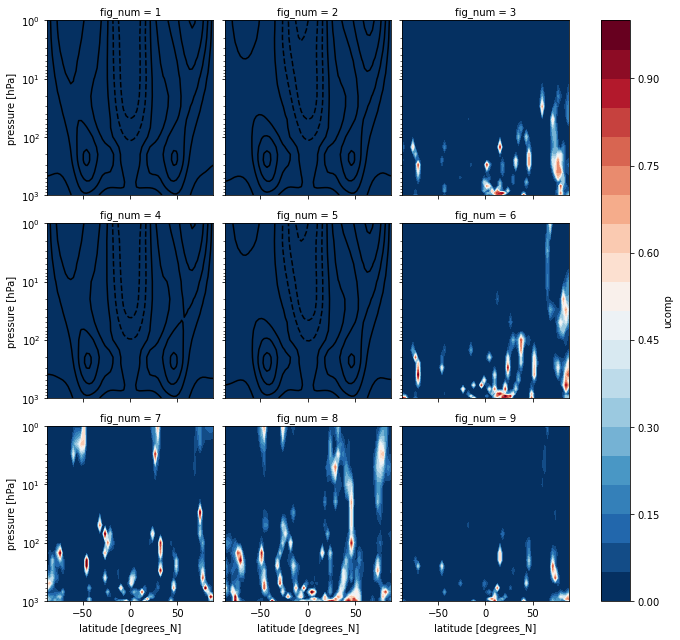

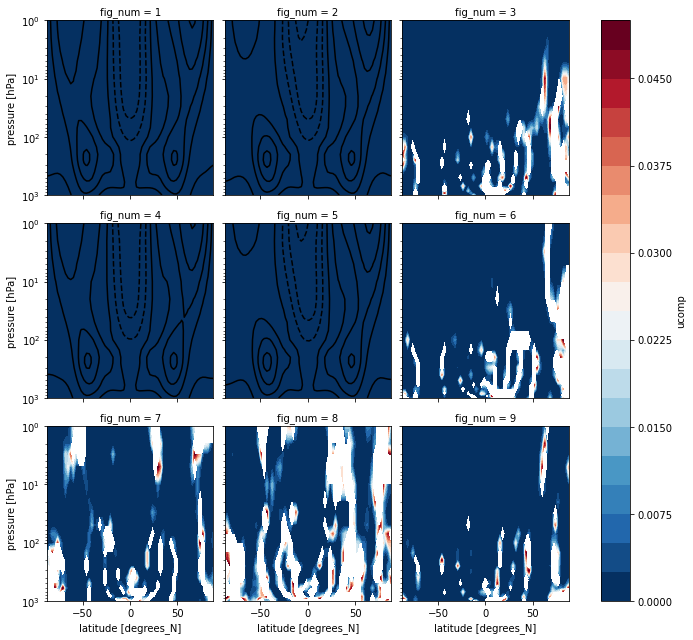

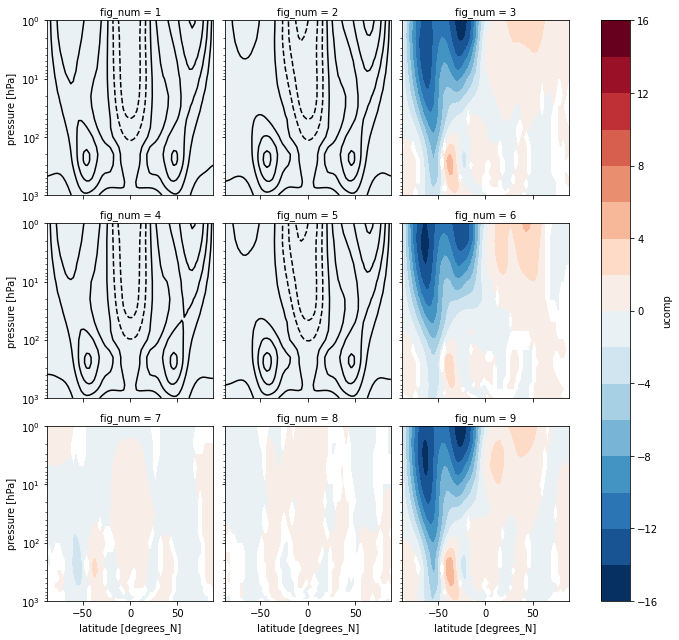

In [38]:
amp_list = ["0.2"]
#fig_diff_filtered  = stats_yay('gh', 'ucomp', amp_list, -90.0, 90.0, 0.0, 100.0, 'lat', 'pfull')
####fig_diff_filtered.savefig("/home/561/gp8431/fig_diff_filtered_gh_02.png")
p_val, p_val_filt, fig_diff_filtered  = ucomp_stats_yay('gh', 'ucomp', amp_list, -90.0, 90.0, 0.0, 100.0, 'lat', 'pfull')
p_val.fig.savefig("/home/561/gp8431/p_val_gh_02.pdf")
p_val_filt.fig.savefig("/home/561/gp8431/p_val_filt_gh_02.pdf")
fig_diff_filtered.fig.savefig("/home/561/gp8431/fig_diff_filtered_gh_02.pdf")

In [2]:
# Amp list is just a single dimension here
def hght_stats_yay(heating, var, amp_list, lat_min, lat_max, p_min, p_max, x_axis, y_axis):
    fig_p = plt.figure(figsize=(16,16))
    fig_p_filtered = plt.figure(figsize=(16,16))
    fig_diff_filtered = plt.figure(figsize=(16,16))
    #fig_model_2 = plt.figure(figsize=(16,16))
    
    # CHECK WHICH LISTS ARE REQUIRED!
    # PLOT WITHOUT THE ZERO CASE
    amp_lp_hnp = []
    #lat_p_list_hnp = []
    
    amp_lp_hnn = []
    #lat_p_list_hnn = []
    
    amp_lp_pnh = []
    #lat_p_list_pnh = []
    
    amp_lp_pnn = []
    #lat_p_list_pnn = []
    
    amp_lp_diag = []
    #lat_p_list_diag = []
    
    lat_p_list = []
    
    # Read in data with time dimension:
    # TAKE MEAN IN LON?? 
    
    # Do significance test on data - names correspond to figure numbers. 
    # INSTEAD MAKE INTO A DATAARRAY??
    
    # ADD DIM VARIABLES
    
    # ADD ANOTHER FOR LOOP TO INITIALISE!
    
    stat_3 = np.zeros((128, 64))
    
    stat_6 = np.zeros_like(stat_3)
    stat_6 = np.zeros_like(stat_3)
    stat_7 = np.zeros_like(stat_3)
    stat_8 = np.zeros_like(stat_3)
    stat_9 = np.zeros_like(stat_3) 
    
    p_3 = np.zeros_like(stat_3)
    p_6 = np.zeros_like(stat_3)
    p_7 = np.zeros_like(stat_3)
    p_8 = np.zeros_like(stat_3)
    p_9 = np.zeros_like(stat_3)
    
    # ADD IF STATEMENT FOR MEAN LON OR SEL 250hPa DEPENDING ON VAR (HGHT OR UCOMP)
    
    #nh_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var).mean('lon')
    #nh_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_-15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var).mean('lon')
    
    #h_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_15_2000_amp_"+amp_list[0]+"/plevel_daily_"+heating+".nc", decode_times = False), var).mean('lon')
    #h_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_-15_2000_amp_"+amp_list[0]+"/plevel_daily_"+heating+".nc", decode_times = False), var).mean('lon') 
 
    nh_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var).sel(pfull=250.0)
    nh_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/gh_As_-15_2000_amp_0.0/plevel_daily_gh.nc", decode_times = False), var).sel(pfull=250.0)
    h_pos = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_15_2000_amp_"+amp_list[0]+"/plevel_daily_"+heating+".nc", decode_times = False), var).sel(pfull=250.0)
    h_neg = getattr(xr.open_dataset("/scratch/w40/gp8431/run/"+heating+"_As_-15_2000_amp_"+amp_list[0]+"/plevel_daily_"+heating+".nc", decode_times = False), var).sel(pfull=250.0)

    print(h_pos)
    
    for j in range(64):
        for i in range(128):
            stat_3[i,j], p_3[i,j] = ks_2samp(nh_pos.isel(lon=i, lat=j).values, nh_neg.isel(lon=i, lat=j).values)
            stat_6[i,j], p_6[i,j] = ks_2samp(h_pos.isel(lon=i, lat=j).values, h_neg.isel(lon=i, lat=j).values)
            stat_7[i,j], p_7[i,j] = ks_2samp(h_neg.isel(lon=i, lat=j).values, nh_neg.isel(lon=i, lat=j).values)
            stat_8[i,j], p_8[i,j] = ks_2samp(h_pos.isel(lon=i, lat=j).values, nh_pos.isel(lon=i, lat=j).values)
            stat_9[i,j], p_9[i,j] = ks_2samp(h_pos.isel(lon=i, lat=j).values, nh_neg.isel(lon=i, lat=j).values)
    
    # MAKE EACH ELEMENT AN XARRAY, THEN ADD COORDINATES (FIG_NUM), THEN CONCAT
    #p_val = [p_3, p_6, p_7, p_8, p_9]

    
    # LATITUDE MAY HAVE ALREADY BEEN CREATED VIA INDEXING IN LOOP?
    # RENAME DIMENSIONS!
    p_1_x = (nh_neg-nh_neg).mean('time')
    #p_3_x = xr.DataArray(p_3, name='pval')
    p_1_x['fig_num'] = 1
    p_1_x['title'] = '1:_nh_As_-15_pval'
    
    p_2_x = (nh_pos-nh_pos).mean('time')
    #p_3_x = xr.DataArray(p_3, name='pval')
    p_2_x['fig_num'] = 2
    p_2_x['title'] = '2:_nh_As_15_pval'
    
    #p_3_x = xr.DataArray(p_3, coords=h_pos.isel(time=1).squeeze().coords, name='pval')
    p_3_x = xr.DataArray(p_3, coords=[getattr(h_pos, x_axis), getattr(h_pos, y_axis)], name='pval')
    #p_3_x = xr.DataArray(p_3, name='pval')
    p_3_x['fig_num'] = 3
    p_3_x['title'] = '3:_2-1'
    
    p_4_x = (h_neg-h_neg).mean('time')
    #p_3_x = xr.DataArray(p_3, name='pval')
    p_4_x['fig_num'] = 4    
    p_4_x['title'] = '4:_h_As_-15_pval'
    
    p_5_x = (h_pos-h_pos).mean('time')
    #p_3_x = xr.DataArray(p_3, name='pval')
    p_5_x['fig_num'] = 5
    p_5_x['title'] = '5:_h_As_15_pval'
    
    #p_6_x = xr.DataArray(p_6, coords=h_pos.isel(time=1).squeeze().coords, name='pval')
    p_6_x = xr.DataArray(p_6, coords=[getattr(h_pos, x_axis), getattr(h_pos, y_axis)], name='pval')
    p_6_x['fig_num'] = 6
    p_6_x['title'] = '6:_5-4'
    
    #p_7_x = xr.DataArray(p_7, coords=h_pos.isel(time=1).squeeze().coords, name='pval')
    p_7_x = xr.DataArray(p_7, coords=[getattr(h_pos, x_axis), getattr(h_pos, y_axis)], name='pval')
    p_7_x['fig_num'] = 7
    p_7_x['title'] = '7:_4-1'
    
    #p_8_x = xr.DataArray(p_8, coords=h_pos.isel(time=1).squeeze().coords, name='pval')
    p_8_x = xr.DataArray(p_8, coords=[getattr(h_pos, x_axis), getattr(h_pos, y_axis)], name='pval')
    p_8_x['fig_num'] = 8
    p_8_x['title'] = '8:_5-2'
    
    #p_9_x = xr.DataArray(p_9, coords=h_pos.isel(time=1).squeeze().coords, name='pval')
    p_9_x = xr.DataArray(p_9, coords=[getattr(h_pos, x_axis), getattr(h_pos, y_axis)], name='pval')
    p_9_x['fig_num'] = 9
    p_9_x['title'] = '9:_5-1'
    
    p_val = [p_1_x, p_2_x, p_3_x, p_4_x, p_5_x, p_6_x, p_7_x, p_8_x, p_9_x]
    
    # Concat all pvals
    #p_val_concat = xr.concat(p_val, dim='fig_num', coords='minimal')
    p_val_concat = xr.concat(p_val, dim='fig_num', coords='minimal', compat='override')
    p_val_concat['fig_num'] = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
    #p_val_concat['title'] = ['1:_nh_As_-15_pval', '2:_nh_As_15_pval', '3:_2-1', '4:_h_As_-15_pval', '5:_h_As_15_pval', '6:_5-4', '7:_4-1', '8:_5-2', '9:_5-1']
    p_val_data = p_val_concat
    
    #p_val_data = p_val_data.rename({"dim_0":"lat", "dim_1":"pfull"})
    # COMMENT OUT FIGS FOR NOW FOR FASTER RUNTIME!
    ######fig_p = p_val_data.plot.contourf(x=x_axis, y=y_axis, col="fig_num", col_wrap=3, cmap='RdBu_r', levels=21)
    #fig_p = p_val_data.plot.contourf(x=x_axis, y=y_axis, col="title", col_wrap=3, cmap='RdBu_r', levels=21)
    
    ######fig_p_filtered = p_val_data.where(p_val_data < 0.05).plot.contourf(x=x_axis, y=y_axis, col="fig_num", col_wrap=3, cmap='RdBu_r', levels=21)
    #fig_p_filtered = p_val_data.where(p_val_data < 0.05).plot.contourf(x=x_axis, y=y_axis, col="title", col_wrap=3, cmap='RdBu_r', levels=21)
    
    # DataArray.where(pval<0.05).plot()
    
    # Compute difference plots 
    
    # ADD A FUNCTION TO RETURN H_NEG AND NH_NEG!!
    
    # HERE - REDEFINE DIFF FOR DAY 5 PLOT!! (#####)
    d = 1003.0
    #####diff = [(nh_neg-nh_neg).mean('time'), (nh_pos-nh_pos).mean('time'), (nh_pos-nh_neg).sel(lat=slice(lat_min, lat_max)).mean('time'), (h_neg-h_neg).mean('time'), (h_pos-h_pos).mean('time'), (h_pos-h_neg).sel(lat=slice(lat_min, lat_max)).mean('time'), (h_neg-nh_neg).sel(lat=slice(lat_min, lat_max)).mean('time'), (h_pos-nh_pos).sel(lat=slice(lat_min, lat_max)).mean('time'), (h_pos-nh_neg).sel(lat=slice(lat_min, lat_max)).mean('time')]
    diff = [(nh_neg-nh_neg).sel(time=d), (nh_pos-nh_pos).sel(time=d), (nh_pos-nh_neg).sel(lat=slice(lat_min, lat_max)).sel(time=d), (h_neg-h_neg).sel(time=d), (h_pos-h_pos).sel(time=d), (h_pos-h_neg).sel(lat=slice(lat_min, lat_max)).sel(time=d), (h_neg-nh_neg).sel(lat=slice(lat_min, lat_max)).sel(time=d), (h_pos-nh_pos).sel(lat=slice(lat_min, lat_max)).sel(time=d), (h_pos-nh_neg).sel(lat=slice(lat_min, lat_max)).sel(time=d)]
    
    
    #diff = diff.sel(lat=slice(lat_min, lat_max)).mean('time')
    #diff_7 = h_neg-nh_neg
    #print(diff_7)
    #diff_7 = diff_7.sel(lat=slice(lat_min, lat_max)).mean('time')
    
    # CHANGE TO CHECK DIFF FIG NUM
    
    diff_concat = xr.concat(diff, dim='fig_num')
    
    # REMOVE FIG_NUM ASSIGNMENT TO KEEP 2D??
    ###diff_concat['fig_num'] = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
    #diff_concat['title'] = ['1:_nh_As_-15_'+var, '2:_nh_As_15_'+var, '3:_2-1', '4:_h_As_-15_'+var, '5:_h_As_15_'+var, '6:_5-4', '7:_4-1', '8:_5-2', '9:_5-1']
    #diff = diff.sel(lat=slice(lat_min, lat_max)).mean('time')
    
    #diff_7_filt = diff_7.where(p_val_data[2] < 0.05)
    diff_filt = diff_concat.where(p_val_data < 0.05)
    
    # SHOULD MAKE DIFF_FILT INTO A DATASET?
    #diff_filt_ds = diff_filt.to_dataset(name=fig_num)

    #fig_diff_7_filtered = diff_7_filt.plot.contourf(x='lat', y='pfull', cmap='RdBu_r', levels=21)
    ## REMOVE THIS SO AS NOT TO PLOT TWICE!!
    ####fig_diff_filtered = diff_filt.plot.contourf(x=x_axis, y=y_axis, cmap='RdBu_r', levels=21, col="fig_num", col_wrap=3)
    
    fig_list = fig_diff_filtered #[fig_p, fig_p_filtered, fig_diff_filtered]
    #data_list = [p_val_data, p_val_data.where(p_val_data < 0.05), diff_filt]
    plt.rcParams["figure.figsize"] = [27,10]
    
    # JUST PUT FIG_DIFF FILTERED IN PLACE OF LOOP OVER FIG_LIST FOR NOW AND REPLACE DATA_LIST[INDEX] W DIFF_FILT!!
    
    #for index in range(3):
    # Need to 
    
    # REDEFINE CONTOUR LIST FOR DAY 5!
    #####contour_list = [nh_neg.mean('time'), nh_pos.mean('time'), h_neg.mean('time'), h_pos.mean('time')]
    contour_list = [nh_neg.sel(time=d), nh_pos.sel(time=d), h_neg.sel(time=d), h_pos.sel(time=d)]
    
    c = 0
    d = 0
    
    fig_diff_filtered, ax, trans = Projection(projection='EqualEarth', nrows=3, ncols=3, transform='PlateCarree', coast=True, kw_args={'central_longitude': 180}) #, col="fig_num", col_wrap = 3)
    for a, b, in enumerate(ax.flatten()):
        #getattr(data_list[index], var).squeeze().plot.contourf(ax=b, cmap='RdBu_r', levels=21, **trans, add_colorbar = True)
        # CHANGE BY ADDING PLT??
        # REMOVE .VALUES??
        #####diff_filt[a].squeeze().plot.contourf(ax=b, cmap='RdBu_r', levels=21, **trans, add_colorbar = True)  #, col="fig_num", col_wrap = 3)
        #b.set_title("Amp = " + amp_list[a])
        if a in [0, 1, 3, 4]:
            contour_list[c].squeeze().plot.contour(ax=b, colors='black', levels=21, **trans, add_colorbar = True) 
            c = c + 1
        elif a in [2, 5, 6, 7, 8]:
            diff_filt[a].squeeze().plot.contourf(ax=b, cmap='RdBu_r', levels=21, **trans, add_colorbar = True)  #, col="fig_num", col_wrap = 3)
            d = d + 1
            
    # MOVE CONTOUR LIST STUFF INTO ABOVE LOOP!
    ###contour_list = [nh_neg.mean('time'), nh_pos.mean('time'), h_neg.mean('time'), h_pos.mean('time')]
    #c = 0
    
    # COMMENT THIS OUT TO CHECK TITLING BEFORE PROJECTIONS (###)
    #for fig in fig_list:
    ###c = 0
    # TRY REFER TO DIFF_FILTERED INSTEAD!
    # TRY AX.FLATTEN()
    ##for j, ax in enumerate(fig_diff_filtered.axes.flat):

    #for j, ax in enumerate(diff_filt.axes.flat): 
    ###for j, k in enumerate(ax.flatten()):
    # ADD FOR LOOP ELEMENT - FOR AX IN [1, 2, 4, 5]
        ###if j in [0, 1, 3, 4]:
            ###data = contour_list[c]
            ###print(data)
            ###print(data.squeeze())
            #k.contour(data.lon, data.lat, data.values, colors='black') #, levels=np.linspace(-100, 100, 21))
            ###data.squeeze().plot.contour(ax=k, colors='black')
            ###c = c + 1
     #   #ax.set_title('anom for amp = %d' % j)
          #  #ax.invert_yaxis()
          #  #ax.set_yscale('log')    

    
    #return fig_p, fig_p_filtered, fig_diff_filtered 
    return fig_diff_filtered

<xarray.DataArray 'hght' (time: 2000, lat: 64, lon: 128)>
[16384000 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
    pfull    float32 250.0
  * time     (time) float64 1.001e+03 1.002e+03 1.003e+03 ... 2.999e+03 3e+03
Attributes:
    units:      m
    long_name:  height


<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

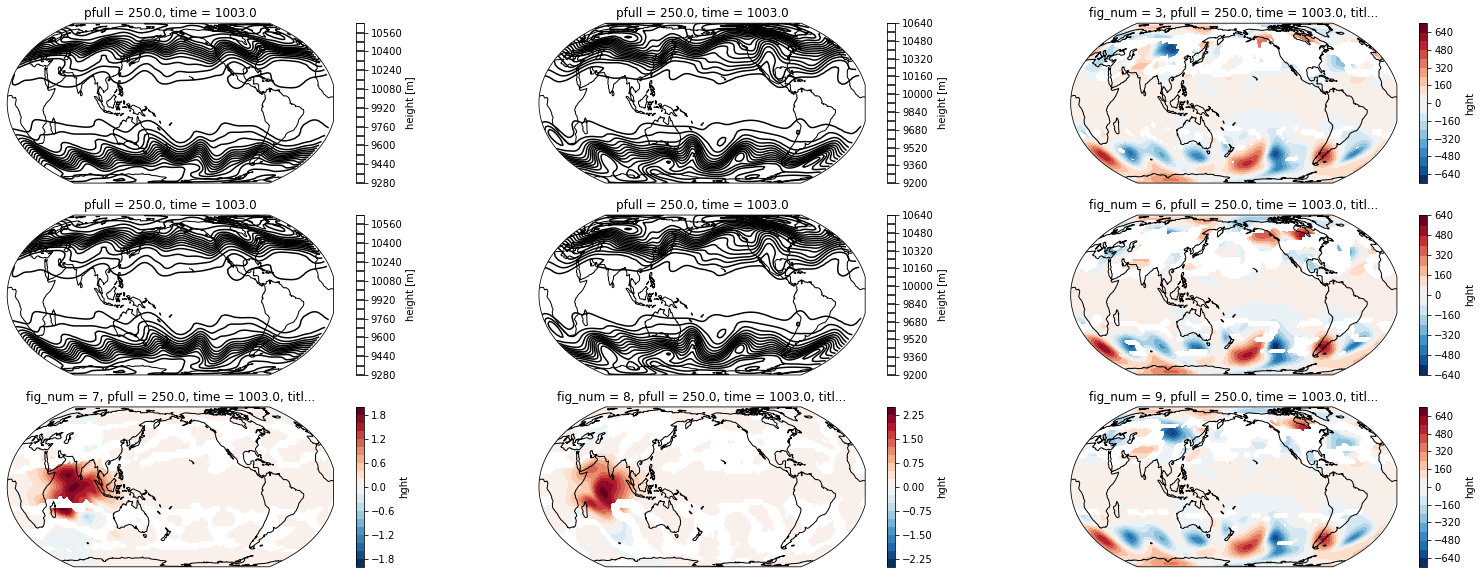

In [3]:
amp_list = ["0.2"]
###p_val, p_val_filt, fig_diff_filtered = hght_stats_yay('gh', 'hght', amp_list, -90.0, 90.0, 0.0, 100.0, 'lon', 'lat')
fig_diff_filtered = hght_stats_yay('gh', 'hght', amp_list, -90.0, 90.0, 0.0, 100.0, 'lon', 'lat')
# CHANGE NAME OF FIG EACH RUN!
fig_diff_filtered.savefig("/home/561/gp8431/fig_diff_filtered_gh_hght_02_day_3.pdf")
#p_val, p_val_filt, fig_diff_7_filtered  = stats_yay('gh', 'ucomp', amp_list, -90.0, 90.0, 0.0, 100.0)
###p_val.fig.savefig("/home/561/gp8431/p_val_gh_hght_02.pdf")
###p_val_filt.fig.savefig("/home/561/gp8431/p_val_filt_gh_hght_02.pdf")
###fig_diff_filtered.fig.savefig("/home/561/gp8431/fig_diff_filtered_gh_hght_02.pdf")
# FIGURE OUT NH NEG VALUES HERE FOR PRINTING, THEN WORK OUT PROJECTIONS!

In [ ]:
data_list_1 = comp_mod_anom(heating, var, plev, amp_list, lat_min, lat_max, lon_min, lon_max, As)
print(data_list_1)

plt.rcParams["figure.figsize"] = [27,10]
# CHANGE NROWS AND NCOLS BASED ON SIZE OF AMP LIST
fig_proj, ax, trans = Projection(projection='EqualEarth', nrows=2, ncols=1, transform='PlateCarree', coast=True, kw_args={'central_longitude': 180})
# REVIEW THIS BY PRINTING AX.FLATTEN
for a, b in enumerate(ax.flatten()):
    #print(getattr(ma_list[a], var).squeeze())
    # Change levels from 21 to 211 and remove vmin, vmax?
    getattr(data_list_1[a], var).squeeze().plot.contourf(ax=b, cmap='RdBu_r', levels=21, **trans, add_colorbar = True)
    b.set_title("Amp = " + amp_list[a])